#**Analyze the Iris Data**

##**1).Importing the Dependencies**

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression

##**2).Data Collection**

In [65]:
d = pd.read_csv('Iris.csv')
d.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [66]:
d.drop(columns='Id',inplace=True)

In [67]:
d.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [68]:
d['target'] = d['Species'].map({'Iris-setosa':1, 'Iris-versicolor':2 ,'Iris-virginica':3})
d.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0            5.1           3.5            1.4           0.2  Iris-setosa   
1            4.9           3.0            1.4           0.2  Iris-setosa   
2            4.7           3.2            1.3           0.2  Iris-setosa   
3            4.6           3.1            1.5           0.2  Iris-setosa   
4            5.0           3.6            1.4           0.2  Iris-setosa   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

In [69]:
d.shape

(150, 6)

In [70]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
 5   target         150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [71]:
d.describe()


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      target
count     150.000000    150.000000     150.000000    150.000000  150.000000
mean        5.843333      3.054000       3.758667      1.198667    2.000000
std         0.828066      0.433594       1.764420      0.763161    0.819232
min         4.300000      2.000000       1.000000      0.100000    1.000000
25%         5.100000      2.800000       1.600000      0.300000    1.000000
50%         5.800000      3.000000       4.350000      1.300000    2.000000
75%         6.400000      3.300000       5.100000      1.800000    3.000000
max         7.900000      4.400000       6.900000      2.500000    3.000000

**Categorical Features:**
- Species

In [72]:
# Checking the missing values in data
d.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
target           0
dtype: int64

**All values are present**

In [73]:
sns.set()

##**4).Data Analysis**

###**(i).Distributions**

<ipython-input-74-197001bc3eed>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['SepalLengthCm'])


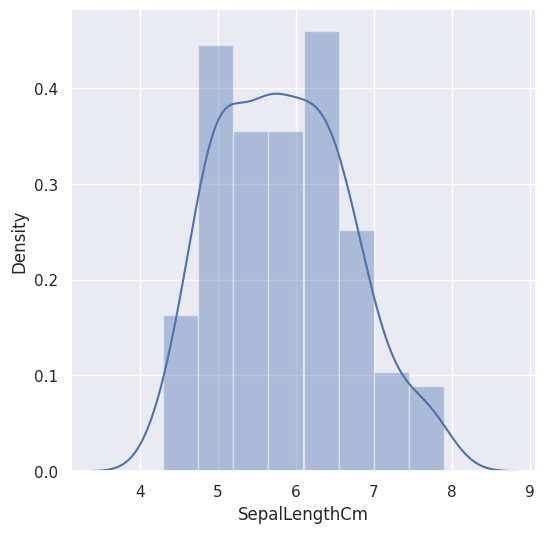

In [74]:
# SepalLengthCm distribution

plt.figure(figsize=(6,6))
sns.distplot(d['SepalLengthCm'])
plt.show()

<ipython-input-75-58e5ce289c69>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['SepalWidthCm'])


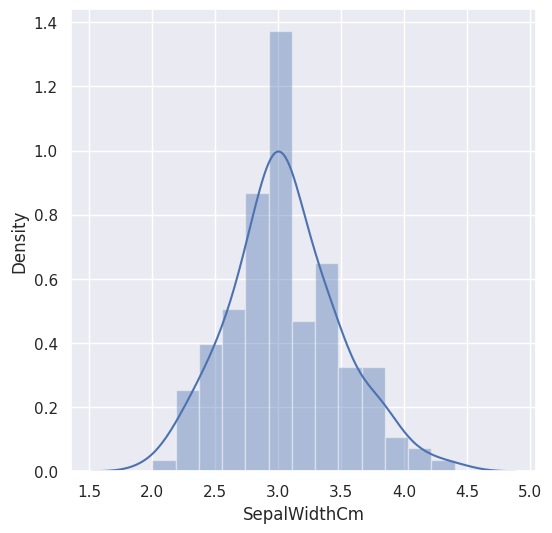

In [75]:
# SepalWidthCm distribution

plt.figure(figsize=(6,6))
sns.distplot(d['SepalWidthCm'])
plt.show()

<ipython-input-76-47a8956ae003>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['PetalLengthCm'])


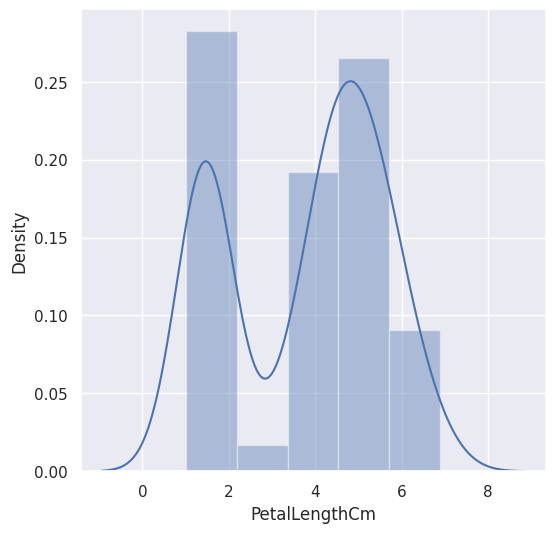

In [76]:
# PetalLengthCm distribution

plt.figure(figsize=(6,6))
sns.distplot(d['PetalLengthCm'])
plt.show()

<ipython-input-77-d8e078c228d6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['PetalWidthCm'])


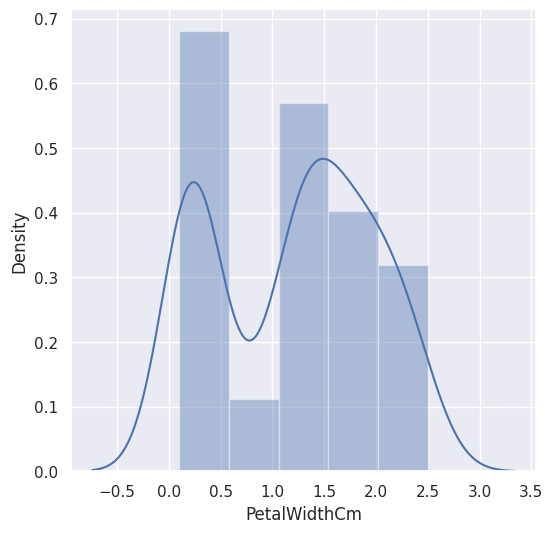

In [77]:
# PetalWidthCm distribution

plt.figure(figsize=(6,6))
sns.distplot(d['PetalWidthCm'])
plt.show()

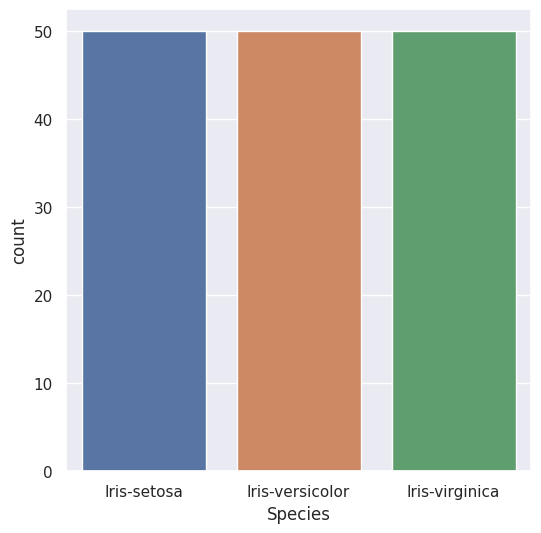

In [78]:
# Species column

plt.figure(figsize=(6,6))
sns.countplot(x='Species', data=d)
plt.show()

###**(ii).Histogram Plots**

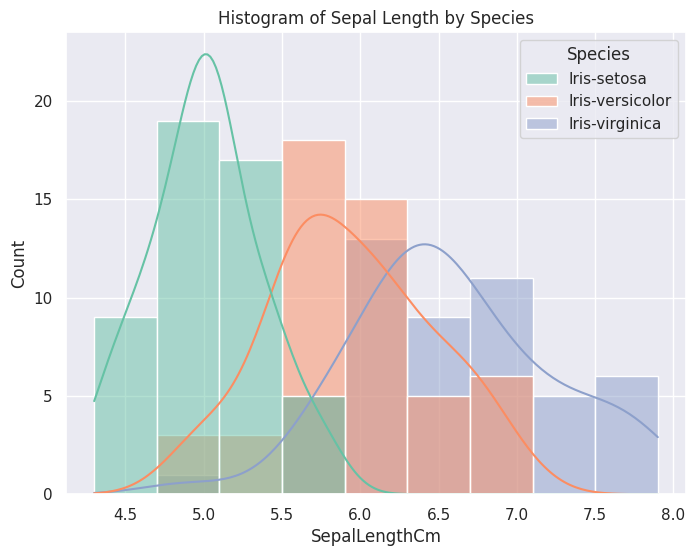

In [79]:
# Histogram for sepal length

plt.figure(figsize=(8, 6))
sns.histplot(data=d, x='SepalLengthCm', hue='Species', kde=True, palette='Set2')
plt.title('Histogram of Sepal Length by Species')
plt.show()

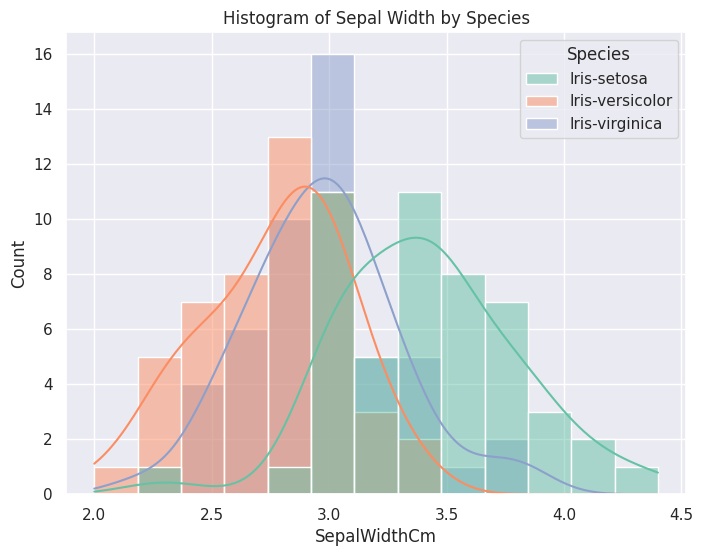

In [80]:
# Histogram for sepal width

plt.figure(figsize=(8, 6))
sns.histplot(data=d, x='SepalWidthCm', hue='Species', kde=True, palette='Set2')
plt.title('Histogram of Sepal Width by Species')
plt.show()

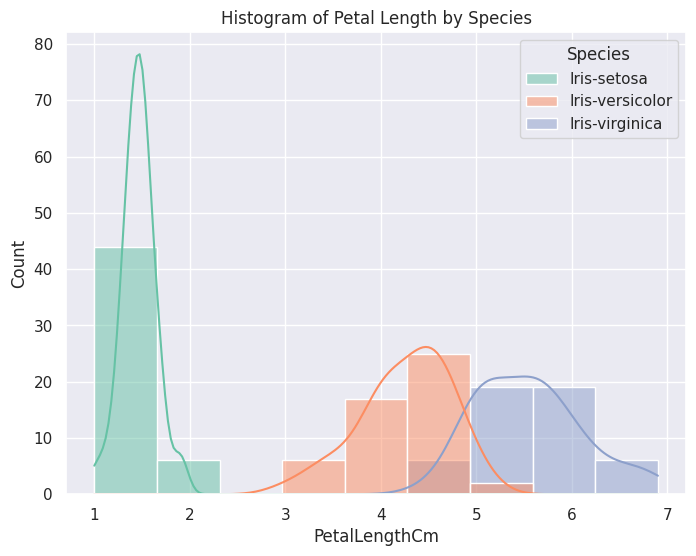

In [81]:
# Histogram for petal length

plt.figure(figsize=(8, 6))
sns.histplot(data=d, x='PetalLengthCm', hue='Species', kde=True, palette='Set2')
plt.title('Histogram of Petal Length by Species')
plt.show()

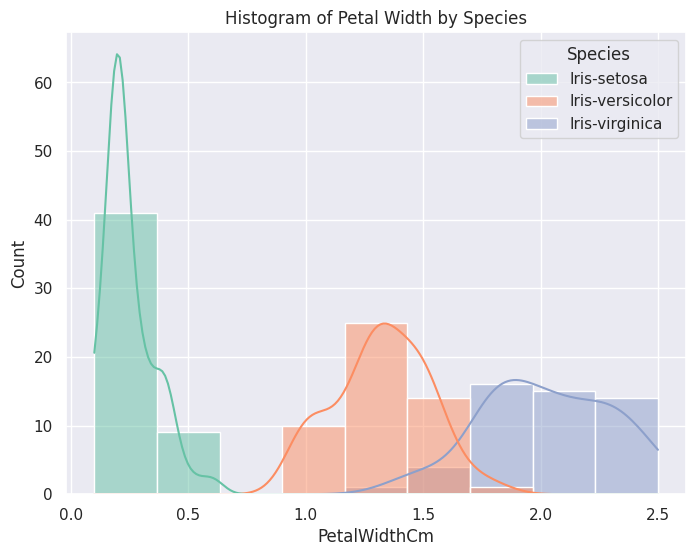

In [82]:
# Histogram for petal width
plt.figure(figsize=(8, 6))
sns.histplot(data=d, x='PetalWidthCm', hue='Species', kde=True, palette='Set2')
plt.title('Histogram of Petal Width by Species')
plt.show()

###**(iii).Box Plots**

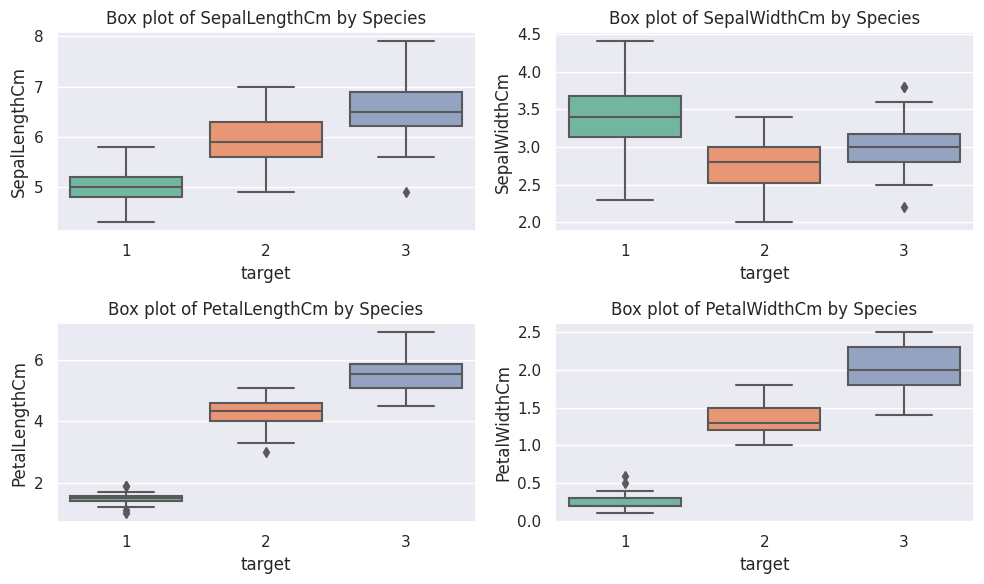

In [83]:
# Box Plots

plt.figure(figsize=(10, 6))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='target', y=d.columns[i], data=d, palette='Set2')
    plt.title(f'Box plot of {d.columns[i]} by Species')
plt.tight_layout()
plt.show()

###**(iv).Scatter Plots**

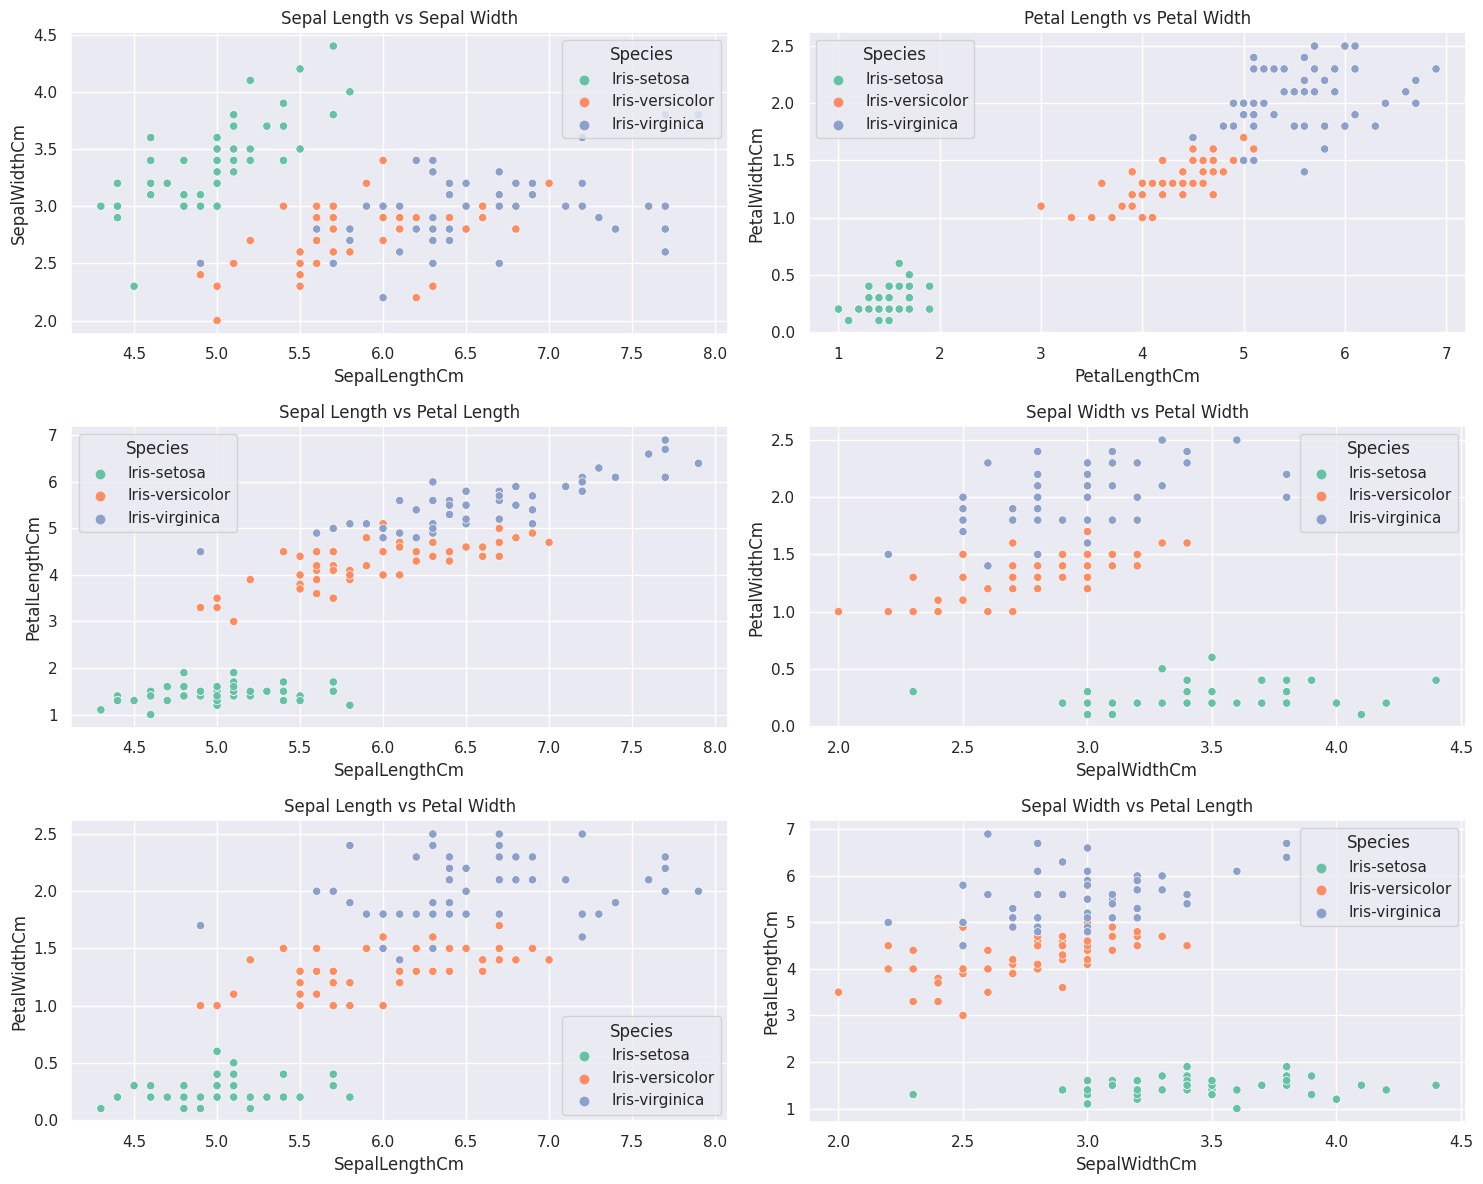

In [84]:
# Scatter plots for relationships between features
plt.figure(figsize=(15, 12))

# Scatter plot for Sepal Length vs Sepal Width
plt.subplot(3, 2, 1)
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=d, palette='Set2')
plt.title('Sepal Length vs Sepal Width')

# Scatter plot for Petal Length vs Petal Width
plt.subplot(3, 2, 2)
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=d, palette='Set2')
plt.title('Petal Length vs Petal Width')

# Scatter plot for Sepal Length vs Petal Length
plt.subplot(3, 2, 3)
sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', hue='Species', data=d, palette='Set2')
plt.title('Sepal Length vs Petal Length')

# Scatter plot for Sepal Width vs Petal Width
plt.subplot(3, 2, 4)
sns.scatterplot(x='SepalWidthCm', y='PetalWidthCm', hue='Species', data=d, palette='Set2')
plt.title('Sepal Width vs Petal Width')

# Scatter plot for Sepal Length vs Petal Width
plt.subplot(3, 2, 5)
sns.scatterplot(x='SepalLengthCm', y='PetalWidthCm', hue='Species', data=d, palette='Set2')
plt.title('Sepal Length vs Petal Width')

# Scatter plot for Sepal Width vs Petal Length
plt.subplot(3, 2, 6)
sns.scatterplot(x='SepalWidthCm', y='PetalLengthCm', hue='Species', data=d, palette='Set2')
plt.title('Sepal Width vs Petal Length')

plt.tight_layout()
plt.show()

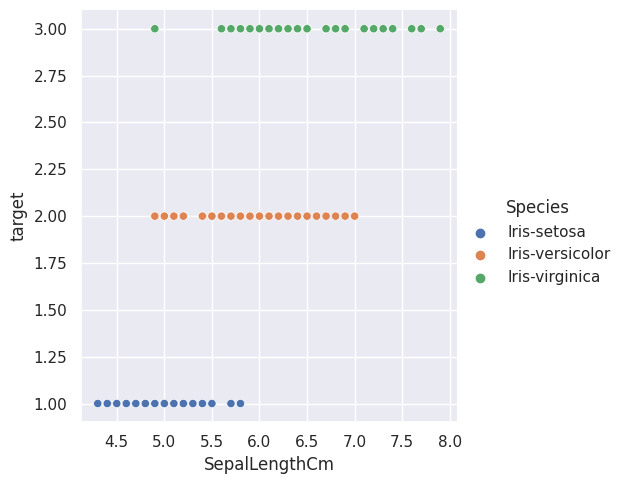

In [85]:
sns.relplot(x='SepalLengthCm', y='target',hue='Species',data=d)

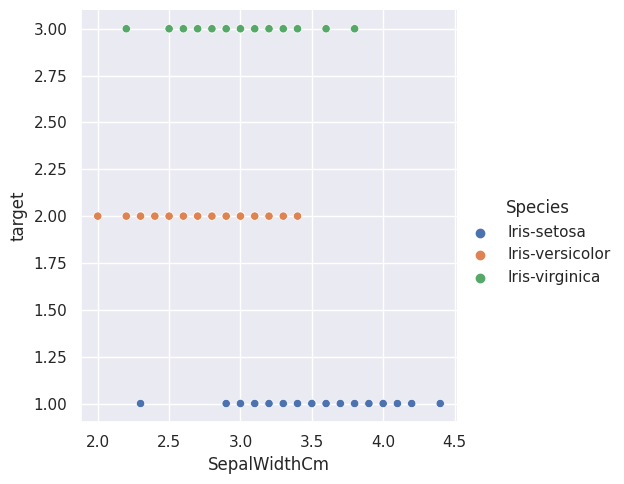

In [86]:
sns.relplot(x='SepalWidthCm', y='target',hue='Species',data=d)

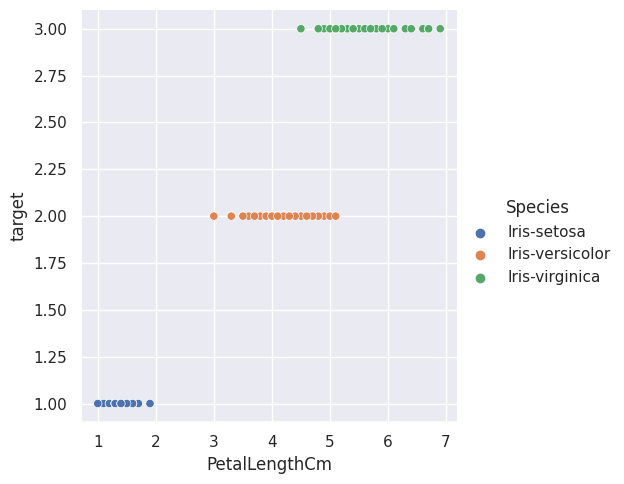

In [87]:
sns.relplot(x='PetalLengthCm', y='target',hue='Species',data=d)

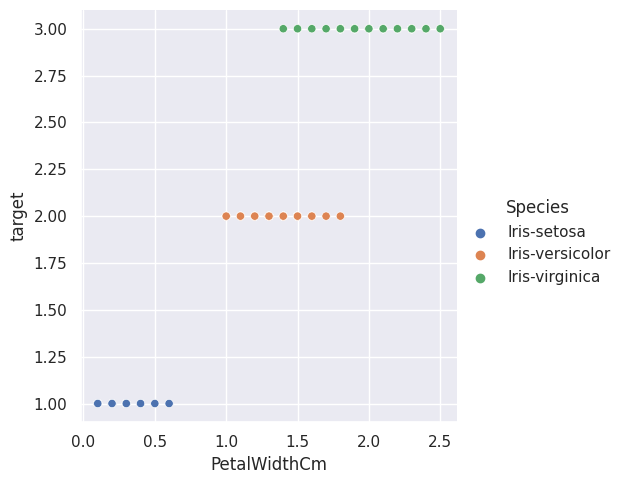

In [88]:
sns.relplot(x='PetalWidthCm', y='target',hue='Species',data=d)

<ipython-input-89-e99695a4386a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(d.corr(), annot=True, cmap='coolwarm', fmt=".2f")


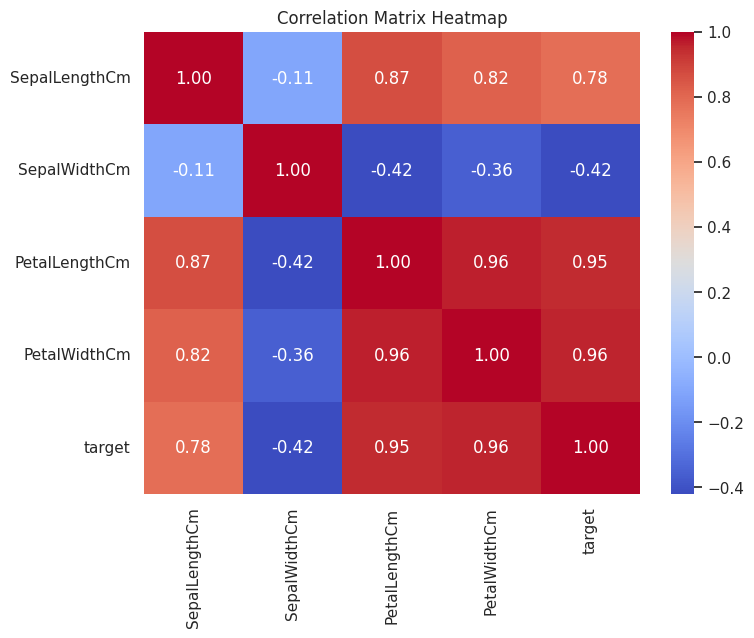

In [89]:
# Correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(d.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

##**(5).Splitting the data into Training data & Testing Data**

In [90]:
d_train , d_test = train_test_split(d,test_size=0.20)

In [91]:
d_train.shape

(120, 6)

In [92]:
d_test.shape

(30, 6)

**Prepare our data for modeling**

In [93]:
X_train = d_train.drop(columns=['Species','target']).values
Y_train = d_train['target'].values

##**(6).Modeling - Logistic Regression Model**

In [94]:
model = LogisticRegression(max_iter=10)

In [95]:
x_train , x_test , y_train , y_test = train_test_split(X_train , Y_train , test_size=0.25)

In [96]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10)

In [97]:
# Predict the test data
y_pred = model.predict(x_test)

In [98]:
y_test

array([3, 2, 3, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 3, 1, 3, 1, 2, 2, 2, 2,
       3, 3, 3, 1, 1, 3, 1, 2])

In [99]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [100]:
np.mean(y_pred == y_test)

0.9666666666666667

In [101]:
model.score(x_test , y_test)

0.9666666666666667

###**(i).Cross-Validation to evaluate our model**


In [102]:
accuracies = cross_val_score(model,X_train,Y_train,cv=5,scoring='accuracy')
np.mean(accuracies)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.9583333333333333

In [103]:
y_pre = cross_val_predict(model,X_train,Y_train,cv=5)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [104]:
# Predicted Correctly Data
pred_corr = y_pre == Y_train
pred_corr

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [105]:
# Predicted Incorrect Data
pred_inc = ~pred_corr
pred_inc

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [106]:
X_train[pred_corr]

array([[7.7, 3. , 6.1, 2.3],
       [7.2, 3.6, 6.1, 2.5],
       [4.7, 3.2, 1.6, 0.2],
       [6.2, 3.4, 5.4, 2.3],
       [4.6, 3.1, 1.5, 0.2],
       [6.7, 3. , 5.2, 2.3],
       [5.5, 4.2, 1.4, 0.2],
       [6.3, 2.9, 5.6, 1.8],
       [7.7, 2.6, 6.9, 2.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.2, 2.7, 3.9, 1.4],
       [4.9, 3. , 1.4, 0.2],
       [6.3, 3.3, 4.7, 1.6],
       [5.8, 4. , 1.2, 0.2],
       [7.6, 3. , 6.6, 2.1],
       [4.4, 3.2, 1.3, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 2.6, 5.6, 1.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.9, 3. , 4.2, 1.5],
       [5.2, 4.1, 1.5, 0.1],
       [5.4, 3.4, 1.7, 0.2],
       [6.4, 2.8, 5.6, 2.1],
       [5.7, 2.5, 5. , 2. ],
       [6.7, 3. , 5. , 1.7],
       [5.7, 3.8, 1.7, 0.3],
       [4.9, 3.1, 1.5, 0.1],
       [4.9, 2.5, 4.5, 1.7],
       [5.6, 2.9, 3.6, 1.3],
       [6.7, 2.5, 5.8, 1.8],
       [7.2, 3.2, 6. , 1.8],
       [5.2, 3.4, 1.4, 0.2],
       [6.1, 2

In [107]:
X_train[pred_inc]

array([[5.6, 3. , 4.5, 1.5],
       [5.4, 3. , 4.5, 1.5],
       [6.3, 2.5, 4.9, 1.5],
       [6. , 2.7, 5.1, 1.6],
       [5.9, 3.2, 4.8, 1.8]])

In [108]:
# Make a copy for adding new columns
d_pred = d_train.copy()

In [109]:
d_pred["correct prediction"] = pred_corr

In [110]:
d_pred

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
135            7.7           3.0            6.1           2.3   
109            7.2           3.6            6.1           2.5   
29             4.7           3.2            1.6           0.2   
148            6.2           3.4            5.4           2.3   
3              4.6           3.1            1.5           0.2   
..             ...           ...            ...           ...   
35             5.0           3.2            1.2           0.2   
119            6.0           2.2            5.0           1.5   
74             6.4           2.9            4.3           1.3   
98             5.1           2.5            3.0           1.1   
41             4.5           2.3            1.3           0.3   

             Species  target  correct prediction  
135   Iris-virginica       3                True  
109   Iris-virginica       3                True  
29       Iris-setosa       1                True  
148   Iris-virginica       3                True  
3        Iris-setosa       1                True  
..               ...     ...                 ...  
35       Iris-setosa       1                True  
119   Iris-virginica       3                True  
74   Iris-versicolor       2                True  
98   Iris-versicolor       2                True  
41       Iris-setosa       1                True  

[120 rows x 7 columns]

In [111]:
d_pred['prediction'] = y_pre

In [112]:
d_pred

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
135            7.7           3.0            6.1           2.3   
109            7.2           3.6            6.1           2.5   
29             4.7           3.2            1.6           0.2   
148            6.2           3.4            5.4           2.3   
3              4.6           3.1            1.5           0.2   
..             ...           ...            ...           ...   
35             5.0           3.2            1.2           0.2   
119            6.0           2.2            5.0           1.5   
74             6.4           2.9            4.3           1.3   
98             5.1           2.5            3.0           1.1   
41             4.5           2.3            1.3           0.3   

             Species  target  correct prediction  prediction  
135   Iris-virginica       3                True           3  
109   Iris-virginica       3                True           3  
29       Iris-setosa       1                True           1  
148   Iris-virginica       3                True           3  
3        Iris-setosa       1                True           1  
..               ...     ...                 ...         ...  
35       Iris-setosa       1                True           1  
119   Iris-virginica       3                True           3  
74   Iris-versicolor       2                True           2  
98   Iris-versicolor       2                True           2  
41       Iris-setosa       1                True           1  

[120 rows x 8 columns]

In [113]:
d_pred['prediction label'] = d_pred['prediction'].map({1:'Iris-setosa', 2:'Iris-versicolor' ,3:'Iris-virginica'})

In [114]:
d_pred.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species  \
135            7.7           3.0            6.1           2.3  Iris-virginica   
109            7.2           3.6            6.1           2.5  Iris-virginica   
29             4.7           3.2            1.6           0.2     Iris-setosa   
148            6.2           3.4            5.4           2.3  Iris-virginica   
3              4.6           3.1            1.5           0.2     Iris-setosa   

     target  correct prediction  prediction prediction label  
135       3                True           3   Iris-virginica  
109       3                True           3   Iris-virginica  
29        1                True           1      Iris-setosa  
148       3                True           3   Iris-virginica  
3         1                True           1      Iris-setosa

###**(ii).Model Tuning**

In [115]:
# Finding the best model for better performance
c = [0,0.1,0.5,1,1.3,1.6,1.9,2.1,2.4,2.6,2.9,3,100,10000]
for i in c:
  print(i)
  model = LogisticRegression(max_iter=200, C=c)

  print(f"Accuracy : {np.mean(accuracies) * 100 :.2f}%")

0
Accuracy : 95.83%
0.1
Accuracy : 95.83%
0.5
Accuracy : 95.83%
1
Accuracy : 95.83%
1.3
Accuracy : 95.83%
1.6
Accuracy : 95.83%
1.9
Accuracy : 95.83%
2.1
Accuracy : 95.83%
2.4
Accuracy : 95.83%
2.6
Accuracy : 95.83%
2.9
Accuracy : 95.83%
3
Accuracy : 95.83%
100
Accuracy : 95.83%
10000
Accuracy : 95.83%


###**(iii).Final Model**

In [116]:
model = LogisticRegression(max_iter=200, C=1)

##**(6).Checking on the testing data set**

In [117]:
X_test = d_test.drop(columns=['Species','target']).values
Y_test = d_test['target'].values

In [118]:
model.fit(x_train,y_train)

LogisticRegression(C=1, max_iter=200)

In [119]:
# Test Data Prediction
y_test_pred = model.predict(X_test)

In [120]:
# Checking the predicted data with the actual data
test_set_pred = (y_test_pred == Y_test)
test_set_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [121]:
test_set_accuracy = np.mean(test_set_pred)

In [122]:
print(f"Test Data Set Accuracy : {np.mean(test_set_accuracy) * 100 :.2f}%")

Test Data Set Accuracy : 100.00%


In [123]:
# Make a copy for adding new columns to show the correctly predicted data in easier way
d_test_pred = d_test.copy()
d_test_pred["correct prediction"] = test_set_pred
d_test_pred['prediction'] = y_test_pred
d_test_pred['prediction label'] = d_test_pred['prediction'].map({1:'Iris-setosa', 2:'Iris-versicolor' ,3:'Iris-virginica'})

In [124]:
d_test_pred.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species  \
99            5.7           2.8            4.1           1.3  Iris-versicolor   
90            5.5           2.6            4.4           1.2  Iris-versicolor   
88            5.6           3.0            4.1           1.3  Iris-versicolor   
13            4.3           3.0            1.1           0.1      Iris-setosa   
69            5.6           2.5            3.9           1.1  Iris-versicolor   

    target  correct prediction  prediction prediction label  
99       2                True           2  Iris-versicolor  
90       2                True           2  Iris-versicolor  
88       2                True           2  Iris-versicolor  
13       1                True           1      Iris-setosa  
69       2                True           2  Iris-versicolor

###**Conclusion**

**I achieved 100 % accuracy on the testing data set using a Logistic Regression.**
